In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#cjvdjdfjd

In [100]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.eigenValues = None
    
    
    def fit(self, X):
        self.mean = np.mean(X, axis = 0)
        X = X - self.mean
        
        # co-varinace
        
        cov = np.cov(X.T)
        
        # eigen valuee, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        self.eigenValues = eigenvalues
        eigenvectors = eigenvectors.T
        
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        
        eigenvectors = eigenvectors[idxs]
        
        
        
        # store first n eigen vector
        self.components = eigenvectors[0:self.n_components]
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


# Dataset Implementation

In [101]:
kc1 = pd.read_csv("Dataset/kc1.csv")

In [102]:
kc1.shape

(2109, 22)

In [103]:
#jm1 = pd.read_csv("Dataset/jm1.csv")

In [104]:
X = kc1.iloc[:,:-1]

In [105]:
Y = kc1.iloc[:,-1]

In [130]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(Y)

In [131]:
Y.shape

(2109,)

In [139]:
pca = PCA(2)

In [140]:
pca.fit(X)
x_tranformData = pca.transform(X)

In [141]:
pca.eigenValues.size

21

In [147]:
ab =  pca.eigenValues / pca.eigenValues.sum()

In [153]:
print(ab.round(5))

[9.9988e-01 1.2000e-04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


In [152]:
x1 = x_tranformData[:, 0]
x2 = x_tranformData[:, 1]


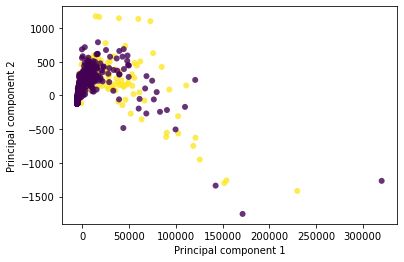

In [145]:

plt.scatter(x1,x2,
            c = y, edgecolor = 'none', alpha = 0.8,
            cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel("Principal component 1",)
plt.ylabel("Principal component 2",)
plt.show()